# Amazon Review Sentiment Analysis
In this project, we will extract amazon reviews of a particular product and do sentiment analysis on it. We will also try to visualize the some important aspects of it.

This project has 2 parts to it:
1. Scraping Reviews
2. Sentiment Analysis

## 1. Scraping Reviews
We will use an inbuilt scaper to scrape the amazon reviews of the required product.
For this we will use the following libraries:
- BeautifulSoup
- Requests
- Pandas

## How it works:
Amazon has assigned a unique **ASIN** number to each of it's product on the website(except the books). We will take the ASIN number from the user, and using this ASIN number we will extract the reviews of the required product.

### HOW TO FIND ASIN NUMBER:
ASIN number is usually found in the "Additional Information" section of a product as shown below:
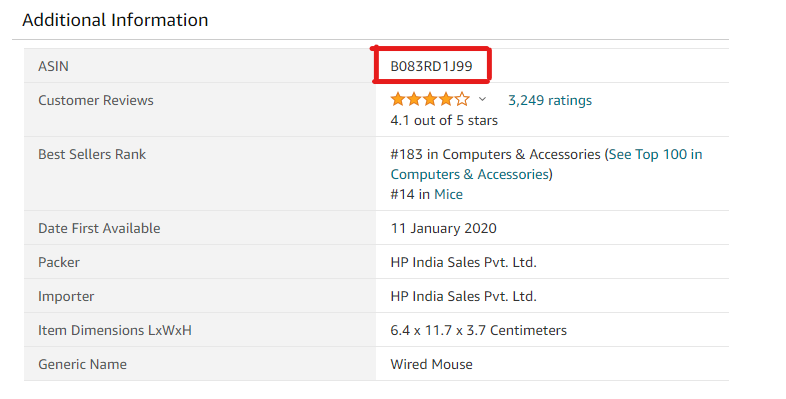

It can also be found in the amazon website url of the product:
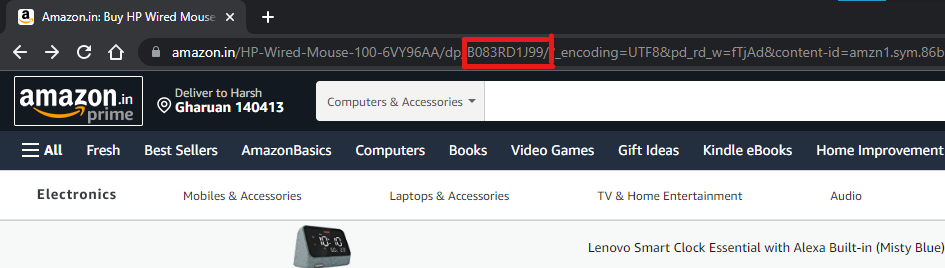

### Using BeautifulSoup
With the help of ASIN Number, we will get the desired review pages of the product.

> Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

We will use beautiful soup to get the HTML data of the required review pages. From these pages, we will pull the required review data by using the specific tags and attributes which contain these data items.

### Using Requests module

Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your PUT & POST data — but nowadays, just use the json method!


### Using Pandas
For the scraper part, we will use pandas to convert dictionary lists into dataframes. We further export these dataframes to .csv or .xlsx files.
Excel files are stored by the naming conventions : *asin_number*-reviews.xlsx

## 2. Sentiment Analysis

After scraping all the reviews for a particular product and storing it in a .csv or .xlsx format. We read this excel file into a dataframe, and further perform sentiment analysis on this review data that we extracted.

## Libraries used:
- Pandas
- Transformers
- tqdm
- seaborn
- matplotlib

### Using Pandas
Pandas is used to read the .csv data. We perform different operations on the dataframe that we create. Dataframes are a core part in data analysis.

### Using Transformers
Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you the time and resources required to train a model from scratch. These models support common tasks in different modalities, such as:

Transformers support framework interoperability between PyTorch, TensorFlow, and JAX. This provides the flexibility to use a different framework at each stage of a model’s life; train a model in three lines of code in one framework, and load it for inference in another. Models can also be exported to a format like ONNX and TorchScript for deployment in production environments.

#### AutoTokenizer
This is a generic tokenizer class that will be instantiated as one of the tokenizer classes of the library when created with the AutoTokenizer.from_pretrained() class method.
AutoTokenizer is used to tokenize a text given to it. It break down the sentence into individual words and stores it into a list.

#### AutoModelForSequenceClassification
This is a generic model class that will be instantiated as one of the model classes of the library (with a sequence classification head) when created with the from_pretrained() class method or the from_config() class method.

#### Pipeline
The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.
This text classification pipeline can currently be loaded from pipeline() using the following task identifier: "sentiment-analysis" (for classifying sequences according to positive or negative sentiments).

If multiple classification labels are available (model.config.num_labels >= 2), the pipeline will run a softmax over the results. If there is a single label, the pipeline will run a sigmoid over the result.

#### Softmax
The softmax function transforms each element of a collection by computing the exponential of each element divided by the sum of the exponentials of all the elements.

#### tqdm
The *tqdm* library provides us with simple means of using and visualizing a progress bar in our program.Using tqdm is very simple, you just need to add your code between tqdm() after importing the library in your code. You need to make sure that the code you put in between the tqdm() function must be iterable or it would not work at all.

#### seaborn
Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

#### matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

## How does it work?
The working of this model is straightforward.
- import the pretrained *Roberta* model to be used.
- model should be given the pretrained twitter sentiment data to learn from.
- Read the excel data that was extracted with teh helo if the *scraper*
- For each review, run it through a scoring function which will perform sentiment analysis on it and give it the respective positive, neutral and negative points along with a 'POSITIVE' or 'NEGATIVE' remark
- Store this review score data in a dataframe, and merge it with the review dataframe with ID as common column
- Remove the inaccurate results, such as 1 star positive review and 5 star negative reviews
- Visualise the remaining data, to show meaningful data



# REVIEW SCRAPER:

In [2]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

# a list which will list all the review values that we extract later
reviewList = []
prodId = 1

# this function parses the html source code of the given url and returns it 
def getSoup(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

# this function extracts the review data from a given soup data
def getReviews(soup):
    global prodId
    reviews = soup.find_all('div', {'data-hook':'review'})
    try:
        for item in reviews:
            review = {
                'Id': prodId,
                'reviewTitle': item.find('a', {'data-hook':'review-title'}).text.strip(),
                'rating': item.find('i', {'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip(),
                'reviewText': item.find('span', {'data-hook':'review-body'}).text.replace('\n',' ').strip()
            }
            prodId += 1
            reviewList.append(review)
    except:
        pass

# -- MAIN PROGRAM --    
    
# asin is a unique id given to every Amazon product    
asin = input('Enter ASIN number of product: ')

x = 1
url = f'https://www.amazon.in/product-reviews/{asin}/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}'
soup = getSoup(url)
productName = soup.find('a', {'data-hook':'product-link'}).text.strip()
print(f'Product: {productName}')

# getting reviews from all the review pages
for x in range(1,999):
    soup = getSoup(f'https://www.amazon.in/product-reviews/{asin}/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}')
    print(f'Getting review page {x}...')
    getReviews(soup)
    if soup.find('li', {'class':'a-disabled a-last'}):
        break 
    else:
        pass
    

# converting list into a dataframe    
df = pd.DataFrame(reviewList)

# converting dataframe to an excel sheet
print('Converting to .xlsx ...')
df.to_excel(asin+'-reviews.xlsx', index=False)
print('Review extraction finished! extracted to file ' + asin +'-review.xlsx :)')

# -- END OF SCRAPER PROGRAM --

Enter ASIN number of product: B08ZJT55V9
Product: Oppo A54 (Crystal Black, 4GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers
Getting review page 1...
Getting review page 2...
Getting review page 3...
Getting review page 4...
Getting review page 5...
Getting review page 6...
Getting review page 7...
Getting review page 8...
Getting review page 9...
Getting review page 10...
Getting review page 11...
Getting review page 12...
Getting review page 13...
Getting review page 14...
Getting review page 15...
Getting review page 16...
Getting review page 17...
Getting review page 18...
Getting review page 19...
Getting review page 20...
Getting review page 21...
Getting review page 22...
Getting review page 23...
Getting review page 24...
Getting review page 25...
Getting review page 26...
Getting review page 27...
Getting review page 28...
Getting review page 29...
Getting review page 30...
Getting review page 31...
Getting review page 32...
Getting review page 33...
Gettin

# SENTIMENT ANALYSIS

### Importing the required libraries

In [3]:
import pandas as pd
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline
from scipy.special import softmax
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

### Using Pretrained model

In [4]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
pipe = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Defining the scoring function

In [5]:
def scoring(text):
    # running for Roberta model
    tokenizedText = tokenizer(text, return_tensors='pt')
    output = model(**tokenizedText)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    remark = pipe(text)[0]['label']
    
    scores_dict = {
        'negative' : scores[0],
        'neutral' : scores[1],
        'positive' : scores[2],
        'remark' : remark
    }
    
    return scores_dict


### Scoring each review and storing it in a results dataframe. Merge this dataframe with the original dataframe of reviews.


In [6]:
df = pd.read_excel(asin+'-reviews.xlsx')

res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['reviewText'][0]
        myId = row['Id']
        res[myId] = scoring(text)
        
    except:
        pass

        
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


  0%|          | 0/733 [00:00<?, ?it/s]

### Removing incorrect data rows

In [7]:
for ind in results_df.index:
    if(results_df['rating'][ind] >= 4.0 and results_df['remark'][ind] == 'NEGATIVE'):
        results_df = results_df.drop(ind)
    elif(results_df['rating'][ind] < 3.0 and results_df['remark'][ind] == 'POSITIVE'):
        results_df = results_df.drop(ind)
    else:
        pass

In [8]:
results_df

,Id,negative,neutral,positive,remark,reviewTitle,rating,reviewText
0,1,0.245331,0.510024,0.244646,POSITIVE,Excellent,5.0,Good
1,2,0.245482,0.541937,0.212581,POSITIVE,"Mobile Is Best For Average User, For Normal Use.",5.0,Some Important Features Are:-1.) Long Lasting ...
2,3,0.247214,0.504908,0.247878,POSITIVE,Excellent smartphone,5.0,Best smartphone in this segment by oppo brand
3,4,0.319863,0.478043,0.202093,POSITIVE,Good product,5.0,Level good
5,6,0.265475,0.49574,0.238785,POSITIVE,Useful,4.0,Useful. Camera quality is good. But seems litt...
...,...,...,...,...,...,...,...,...
686,725,0.236289,0.547696,0.216015,NEGATIVE,Wastage for money,1.0,Poor phone
687,726,0.212596,0.514271,0.273133,POSITIVE,Ok,5.0,V good
688,727,0.220812,0.562159,0.217029,POSITIVE,For my work,5.0,It was quit nice
691,730,0.212596,0.514271,0.273133,POSITIVE,Super,5.0,Very nice


### Plotting the data

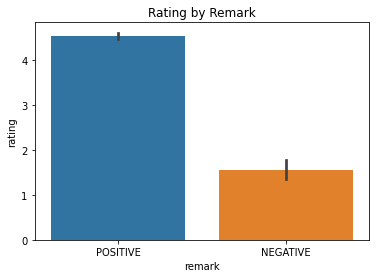

In [9]:
ax = sns.barplot(data=results_df, x='remark', y='rating')
ax.set_title('Rating by Remark')
plt.show()

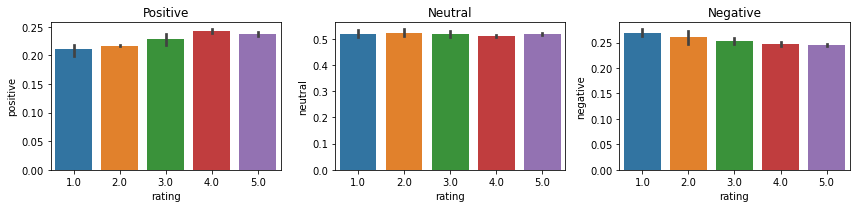

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='rating', y='positive', ax=axs[0])
sns.barplot(data=results_df, x='rating', y='neutral', ax=axs[1])
sns.barplot(data=results_df, x='rating', y='negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

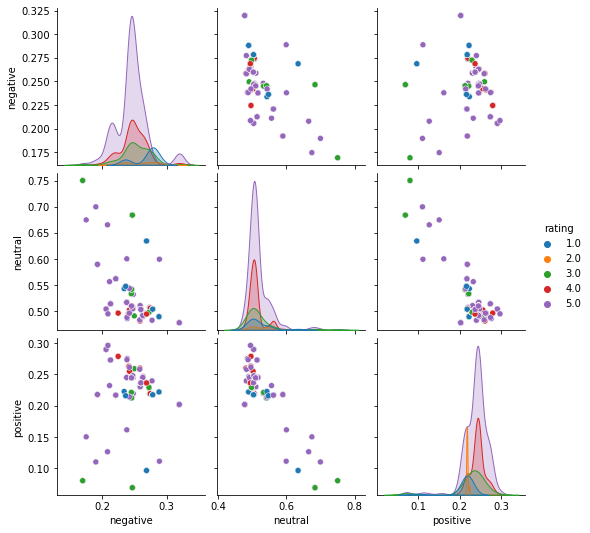

In [11]:
sns.pairplot(data=results_df,
             vars=['negative', 'neutral', 'positive'],
            hue='rating',
            palette='tab10')
plt.show()


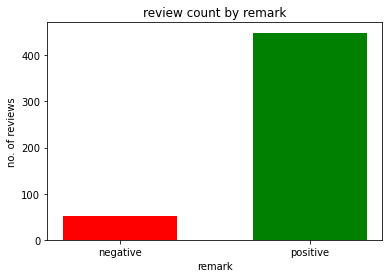

In [26]:
positiveCount = 0
negativeCount = 0
for ind in results_df.index:
    global positiveCount
    global negativeCount
    if results_df['remark'][ind] == 'POSITIVE':
        positiveCount += 1
    else:
        negativeCount += 1

remark_count=[negativeCount, positiveCount]
left = [1, 2]
label = ['negative', 'positive']

plt.bar(left, remark_count, tick_label = label,
        width = 0.6, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('remark')
# naming the y-axis
plt.ylabel('no. of reviews')
# plot title
plt.title('review count by remark')
  
# function to show the plot
plt.show()


# END OF PROJECT